<a href="https://colab.research.google.com/github/baubek408/Web_Scraping/blob/opened/Amazon_web_scrap/mini_pc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('mini_pc.csv')

In [4]:
df.head()

,title,operating_system,ram_memory,cpu_model,cpu_speed,price
0,Beelink,Windows 11 Pro,NaN,AMD R Series,4.6 GHz,$799.00
1,COOFUN,Windows 10,32 GB,Ryzen 9,4.4 GHz,$609.99
2,Beelink,Windows 11 Pro,16 GB,NaN,4.4 GHz,$335.00
3,Beelink,Windows 11 Pro,16 GB,Ryzen 7 4800U,4.2 GHz,$559.00
4,Beelink,Windows 11 Pro,NaN,Ryzen 7 4700U,4.1 GHz,$449.00


In [5]:
df.index = np.arange(1, len(df) + 1)

In [6]:
df.head()

,title,operating_system,ram_memory,cpu_model,cpu_speed,price
1,Beelink,Windows 11 Pro,NaN,AMD R Series,4.6 GHz,$799.00
2,COOFUN,Windows 10,32 GB,Ryzen 9,4.4 GHz,$609.99
3,Beelink,Windows 11 Pro,16 GB,NaN,4.4 GHz,$335.00
4,Beelink,Windows 11 Pro,16 GB,Ryzen 7 4800U,4.2 GHz,$559.00
5,Beelink,Windows 11 Pro,NaN,Ryzen 7 4700U,4.1 GHz,$449.00


In [7]:
df['add_info'] = df.loc[df.title.apply(lambda x: len(x) > 15), :].title.apply(lambda x: str(x).split(','))

In [8]:
df[~df['add_info'].isnull()]

,title,operating_system,ram_memory,cpu_model,cpu_speed,price,add_info
66,"HP Pavilion Desktop PC, AMD Ryzen 3 5300G, 4 G...",NaN,NaN,NaN,4.2 GHz,$542.01,"[HP Pavilion Desktop PC, AMD Ryzen 3 5300G, ..."
81,"VISION COMPUTERS, INC.",Windows 10 Pro,16 GB,Ryzen 5 5600G,3.4 GHz,$769.00,"[VISION COMPUTERS, INC.]"
324,HP Business Desktop ProDesk 405 G8 Desktop Com...,NaN,NaN,NaN,4 GHz,$651.85,[HP Business Desktop ProDesk 405 G8 Desktop Co...


In [9]:
pc_66 = df.loc[66,:].title.split(',')
pc_66

['HP Pavilion Desktop PC',
 ' AMD Ryzen 3 5300G',
 ' 4 GB RAM',
 ' 256 GB SSD',
 ' Windows 11 Home',
 ' Wi-Fi 5 & Bluetooth Connectivity',
 ' Wired Mouse and Keyboard Combo | Microsoft 365 Family 15-Month Subscription']

In [10]:
pc_81= df.loc[81,:].title.split(',')
pc_81

['VISION COMPUTERS', ' INC.']

In [11]:
pc_324 = df.loc[324,:].title.split(',')
pc_324

['HP Business Desktop ProDesk 405 G8 Desktop Computer',
 ' AMD Ryzen 5 PRO 5650GE',
 ' Windows 11 Pro',
 ' 8GB RAM',
 ' 256GB SSD',
 ' Desktop Mini (69D91UT#ABA)']

In [14]:
df.shape

(327, 7)

In [55]:
edited = df.drop(columns="add_info", axis=1)

In [56]:
edited = edited.dropna(how="any")

In [57]:
edited.shape

(84, 6)

In [58]:
edited.head()

,title,operating_system,ram_memory,cpu_model,cpu_speed,price
2,COOFUN,Windows 10,32 GB,Ryzen 9,4.4 GHz,$609.99
4,Beelink,Windows 11 Pro,16 GB,Ryzen 7 4800U,4.2 GHz,$559.00
7,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,$829.99
11,Beelink,Windows 11 Pro,32 GB,Ryzen 9,4.4 GHz,$569.00
17,COOFUN,Windows 11 Pro,16 GB,Ryzen 5,4.3 GHz,$549.99


In [59]:
edited["price"] = edited["price"].apply(lambda x: str(x).replace(",", "").strip())
edited["price"] = edited["price"].apply(lambda x: str(x).replace("$", "").strip())


In [60]:
edited["price"] = edited["price"].astype("float64")

In [78]:
edited.rename(columns={'operating_system':'OS'}, inplace = True)

In [62]:
edited.reset_index(drop=True, inplace=True)

In [63]:
edited.head()

,title,operating_system,ram_memory,cpu_model,cpu_speed,price
0,COOFUN,Windows 10,32 GB,Ryzen 9,4.4 GHz,609.99
1,Beelink,Windows 11 Pro,16 GB,Ryzen 7 4800U,4.2 GHz,559.00
2,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,829.99
3,Beelink,Windows 11 Pro,32 GB,Ryzen 9,4.4 GHz,569.00
4,COOFUN,Windows 11 Pro,16 GB,Ryzen 5,4.3 GHz,549.99


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

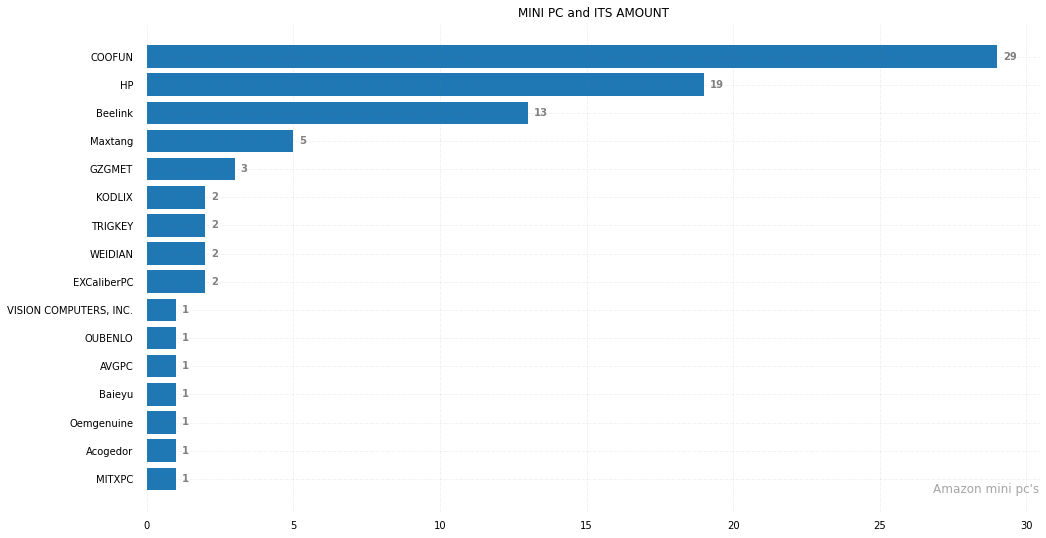

In [91]:
name = edited['title'].value_counts().index
values = edited['title'].value_counts().values
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('MINI PC and ITS AMOUNT',
             loc ='center', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Amazon mini pc\'s', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [92]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [93]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image

In [105]:
from traitlets import traitlets
plt.figure(figsize=(14,7));

Title = edited['title'].value_counts(sort=True).index
Count = edited['title'].value_counts(sort=True)

fig = px.pie(names = Title,
             values = Count,
             title = 'Pie of mini pc')
fig.update_traces(textposition='inside', textinfo='percent+label')

<Figure size 1008x504 with 0 Axes>

In [120]:
top_10_expensive = edited.sort_values(by='price', ascending = False).head()
top_10_expensive

,title,OS,ram_memory,cpu_model,cpu_speed,price
62,HP,Windows 11 Pro,64 GB,AMD Ryzen 7,3.8 GHz,1049.00
76,HP,Windows 11 Home,32 GB,Ryzen 5,3.9 GHz,1049.00
63,HP,Windows 11 Home,16 GB,Ryzen 5,3.9 GHz,948.98
54,Oemgenuine,Windows 10 Pro,32 GB,Ryzen 5,3.3 GHz,899.95
67,HP,Windows 11 Home,32 GB,Ryzen 5,3.9 GHz,899.00
75,EXCaliberPC,Windows 11 Home,16 GB,Ryzen 5,3.9 GHz,849.00
20,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,829.99
73,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,829.99
64,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,829.99
34,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,829.99


In [140]:
### top 10 expensive mini_pc by each manufacturer
edited.sort_values(by=['price', 'title'], ascending = False).drop_duplicates(subset='title').head(10)

,title,OS,ram_memory,cpu_model,cpu_speed,price
62,HP,Windows 11 Pro,64 GB,AMD Ryzen 7,3.8 GHz,1049.00
54,Oemgenuine,Windows 10 Pro,32 GB,Ryzen 5,3.3 GHz,899.95
75,EXCaliberPC,Windows 11 Home,16 GB,Ryzen 5,3.9 GHz,849.00
2,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,829.99
8,KODLIX,Windows 10,32 GB,Ryzen 9,3.3 GHz,829.90
70,MITXPC,None,16 GB,V SERIES V160,2 GHz,824.95
12,Beelink,Windows 11 Pro,64 GB,AMD R Series,4.6 GHz,799.00
22,"VISION COMPUTERS, INC.",Windows 10 Pro,16 GB,Ryzen 5 5600G,3.4 GHz,769.00
26,OUBENLO,Windows 11 Pro,16 GB,Ryzen 9,4.6 GHz,729.90
40,Baieyu,Windows 10 Pro,32 GB,Ryzen 7 3700U,2.3 GHz,727.95


In [143]:
### coefficients of price per perfomance - [price/ (ram / 8 + speed)]

0.003717826501429933

In [154]:
edited.head()

,title,OS,ram_memory,cpu_model,cpu_speed,price
0,COOFUN,Windows 10,32 GB,Ryzen 9,4.4 GHz,609.99
1,Beelink,Windows 11 Pro,16 GB,Ryzen 7 4800U,4.2 GHz,559.00
2,COOFUN,Windows 11 Pro,32 GB,Ryzen 9,4.2 GHz,829.99
3,Beelink,Windows 11 Pro,32 GB,Ryzen 9,4.4 GHz,569.00
4,COOFUN,Windows 11 Pro,16 GB,Ryzen 5,4.3 GHz,549.99


In [160]:
### Drop rows with 0,00$ price
edited = edited.drop(edited[edited['price'] ==0].index)

In [165]:
### Edit columns data types to numeric for further calculation
edited['ram_memory'] = edited['ram_memory'].apply(lambda x: str(x).replace(" GB", ''))
edited['ram_memory'] = edited['ram_memory'].astype('float64')


In [186]:
edited['cpu_speed'] = edited['cpu_speed'].apply(lambda x: str(x).replace(" GHz", ''))
edited['cpu_speed'] = edited['cpu_speed'].apply(lambda x: str(x).replace(" Hz", ''))
edited['cpu_speed'] = edited['cpu_speed'].astype('float64')

In [190]:
edited['cpu_speed'].unique()

array([4.4e+00, 4.2e+00, 4.3e+00, 4.0e+00, 3.8e+03, 3.2e+00, 3.3e+00,
       3.5e+00, 4.6e+00, 3.7e+00, 3.4e+00, 3.0e+00, 4.8e+00, 2.1e+00,
       1.6e+00, 2.3e+00, 3.6e+00, 3.8e+00, 3.9e+00, 2.0e+00])

In [183]:
edited.at[66, 'cpu_speed'] = '3.6'

In [188]:
edited.loc[66, 'cpu_speed']

3.6

In [192]:
edited[edited['cpu_speed']> 1000]

,title,OS,ram_memory,cpu_model,cpu_speed,price
6,HP,Windows 10 Pro,8.0,Ryzen 5 2400GE,3800.0,221.49


In [193]:
edited.at[6, 'cpu_speed'] = '3.8'

In [211]:
edited['coef'] = (edited['price']/(edited['ram_memory'] / 16 + edited['cpu_speed']) )

In [212]:
edited.head()

,title,OS,ram_memory,cpu_model,cpu_speed,price,coef
0,COOFUN,Windows 10,32.0,Ryzen 9,4.4,609.99,72.617857
1,Beelink,Windows 11 Pro,16.0,Ryzen 7 4800U,4.2,559.00,90.161290
2,COOFUN,Windows 11 Pro,32.0,Ryzen 9,4.2,829.99,101.218293
3,Beelink,Windows 11 Pro,32.0,Ryzen 9,4.4,569.00,67.738095
4,COOFUN,Windows 11 Pro,16.0,Ryzen 5,4.3,549.99,87.300000


In [216]:
best = edited.sort_values(by=(["coef", "ram_memory"]), ascending = False).drop_duplicates(subset='title')

In [221]:
best[(best['ram_memory'] >= 16) & (best['cpu_speed'] > 3)].sort_values(by='price')

,title,OS,ram_memory,cpu_model,cpu_speed,price,coef
1,Beelink,Windows 11 Pro,16.0,Ryzen 7 4800U,4.2,559.00,90.161290
28,AVGPC,Windows 10,16.0,Ryzen 7,4.8,699.00,102.794118
26,OUBENLO,Windows 11 Pro,16.0,Ryzen 9,4.6,729.90,110.590909
22,"VISION COMPUTERS, INC.",Windows 10 Pro,16.0,Ryzen 5 5600G,3.4,769.00,142.407407
2,COOFUN,Windows 11 Pro,32.0,Ryzen 9,4.2,829.99,101.218293
75,EXCaliberPC,Windows 11 Home,16.0,Ryzen 5,3.9,849.00,143.898305
54,Oemgenuine,Windows 10 Pro,32.0,Ryzen 5,3.3,899.95,123.280822


In [ ]:
### Best mini computer for me would be the Beelink model!!!! 